In [1]:
# generate model.py
import numpy as np
import xgboost as xgb
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Generate  training data
np.random.seed(42)
X = np.random.rand(100, 34)  # 100 samples, 34 features (17 keypoints x,y)
y = np.random.randint(0, 2, 100)  # Binary labels

# Create and train dummy model
model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=10,
    max_depth=3
)
model.fit(X, y)

# Save the model
with open("models/xgboost_dcsass.pkl", "wb") as f:
    pickle.dump(model, f)

print("Successfully generated model at models/xgboost_dcsass.pkl")

Successfully generated model at models/xgboost_dcsass.pkl


In [2]:
# test_model.py
import pickle
import numpy as np

# Load the model
with open("models/xgboost_dcsass.pkl", "rb") as f:
    model = pickle.load(f)

# Generate a test sample (34 features)
test_sample = np.random.rand(1, 34)

# Make prediction
prediction = model.predict(test_sample)
probability = model.predict_proba(test_sample)

print(f"Test sample prediction: {prediction[0]} (0=normal, 1=suspicious)")
print(f"Probabilities: [Normal: {probability[0][0]:.2f}, Suspicious: {probability[0][1]:.2f}]")

Test sample prediction: 0 (0=normal, 1=suspicious)
Probabilities: [Normal: 0.77, Suspicious: 0.23]


In [3]:
import os
import pandas as pd
import numpy as np

# Path where to save CSV
dataset_dir = r"D:\Final year project\yolo version project\DCSASS Dataset"
csv_path = os.path.join(dataset_dir, "train.csv")

# Number of samples and features (adjust accordingly)
num_samples = 100
num_features = 20  # example feature columns

# Generate random features and binary labels
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, size=(num_samples,))

# Create DataFrame
columns = [f"feature_{i}" for i in range(num_features)]
df = pd.DataFrame(X, columns=columns)
df["label"] = y

# Save CSV
df.to_csv(csv_path, index=False)
print(f"Dummy CSV created at {csv_path}")


Dummy CSV created at D:\Final year project\yolo version project\DCSASS Dataset\train.csv


In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # pip install tqdm

EPOCHS = 10

def load_dcsass(data_path=r"D:\Final year project\yolo version project\DCSASS Dataset\train.csv"):
    df = pd.read_csv(data_path)
    X = df.drop("label", axis=1).values
    y = df["label"].values
    return X, y

def train_with_progress():
    X, y = load_dcsass()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 5,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'seed': 42
    }

    evals_result = {}

    print("Starting training...")
    for epoch in tqdm(range(1, EPOCHS+1), desc="Epochs"):
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=1,  # train one boosting round at a time
            evals=[(dtrain, 'train'), (dval, 'validation')],
            evals_result=evals_result,
            xgb_model=model if epoch > 1 else None,
            verbose_eval=False
        )

        # Calculate accuracy after this epoch
        y_val_pred_prob = model.predict(dval)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
        val_acc = accuracy_score(y_val, y_val_pred)

        print(f"Epoch {epoch}/{EPOCHS} completed. Validation Accuracy: {val_acc:.4f}")

if __name__ == "__main__":
    train_with_progress()


Starting training...


Epochs: 100%|█████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 107.49it/s]

Epoch 1/10 completed. Validation Accuracy: 0.5500
Epoch 2/10 completed. Validation Accuracy: 0.5500
Epoch 3/10 completed. Validation Accuracy: 0.6000
Epoch 4/10 completed. Validation Accuracy: 0.6000
Epoch 5/10 completed. Validation Accuracy: 0.6000
Epoch 6/10 completed. Validation Accuracy: 0.5500
Epoch 7/10 completed. Validation Accuracy: 0.4500
Epoch 8/10 completed. Validation Accuracy: 0.5500
Epoch 9/10 completed. Validation Accuracy: 0.5500
Epoch 10/10 completed. Validation Accuracy: 0.5500


Starting training...


Epochs: 100%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.82it/s]

Epoch 1/10
  Train Loss: 0.6569 | Val Loss: 0.6895
  Train Acc: 0.7500 | Val Acc: 0.5500
  Sample predictions (val):
    True: 1 | Pred: 0
    True: 0 | Pred: 0
    True: 1 | Pred: 1
    True: 1 | Pred: 1
    True: 1 | Pred: 0
Epoch 1/10
  Train Loss: 0.6291 | Val Loss: 0.6870
  Train Acc: 0.7750 | Val Acc: 0.5500
  Sample predictions (val):
    True: 1 | Pred: 0
    True: 0 | Pred: 0
    True: 1 | Pred: 0
    True: 1 | Pred: 1
    True: 1 | Pred: 0
Epoch 1/10
  Train Loss: 0.5953 | Val Loss: 0.6869
  Train Acc: 0.8250 | Val Acc: 0.6000
  Sample predictions (val):
    True: 1 | Pred: 0
    True: 0 | Pred: 0
    True: 1 | Pred: 0
    True: 1 | Pred: 1
    True: 1 | Pred: 0
Epoch 1/10
  Train Loss: 0.5702 | Val Loss: 0.6904
  Train Acc: 0.8500 | Val Acc: 0.6000
  Sample predictions (val):
    True: 1 | Pred: 0
    True: 0 | Pred: 0
    True: 1 | Pred: 0
    True: 1 | Pred: 1
    True: 1 | Pred: 0
Epoch 1/10
  Train Loss: 0.5482 | Val Loss: 0.6896
  Train Acc: 0.9125 | Val Acc: 0.6000
  S

Model and training curves saved to 'models/' directory.


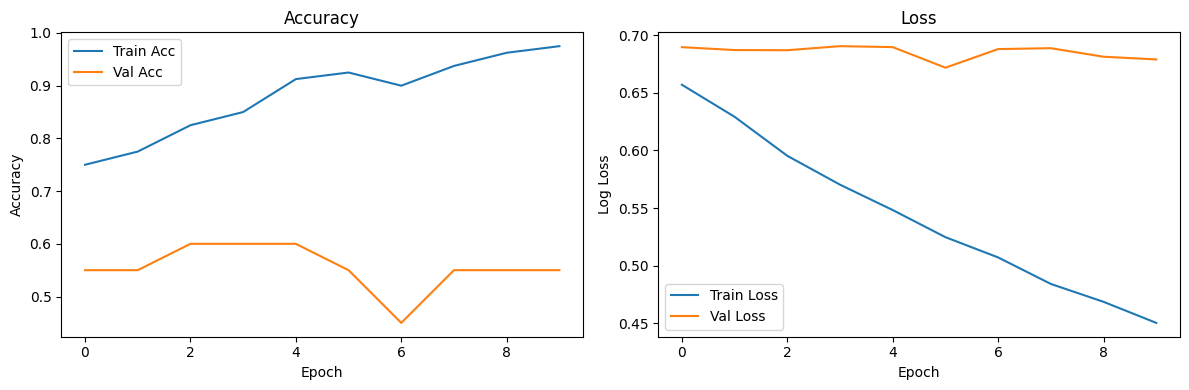

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle
import os
from tqdm import tqdm  # for progress bar

# --- Config ---
MODEL_PATH = "models/xgboost_dcsass.pkl"
EPOCHS = 10
RANDOM_STATE = 42
LOG_INTERVAL = 1  # log every epoch

# --- Load Dataset ---
def load_dcsass(data_path=r"D:\Final year project\yolo version project\DCSASS Dataset\train.csv"):
    df = pd.read_csv(data_path)
    X = df.drop("label", axis=1).values
    y = df["label"].values
    return X, y

# --- Custom Callback for Logging ---
class XGBLoggingCallback(xgb.callback.TrainingCallback):
    def __init__(self, eval_set, eval_metric, sample_size=5):
        self.eval_set = eval_set  # list of (X, y) tuples
        self.eval_metric = eval_metric
        self.history = {
            'train_acc': [],
            'val_acc': [],
            'train_loss': [],
            'val_loss': []
        }
        self.dtrain = xgb.DMatrix(eval_set[0][0])
        self.dval = xgb.DMatrix(eval_set[1][0])
        self.sample_size = sample_size
    
    def after_iteration(self, model, epoch, evals_log):
        train_log = evals_log['train'][self.eval_metric][-1]
        val_log = evals_log['validation'][self.eval_metric][-1]
        
        self.history['train_loss'].append(train_log)
        self.history['val_loss'].append(val_log)
        
        # Predict probabilities
        y_train_pred_prob = model.predict(self.dtrain)
        y_val_pred_prob = model.predict(self.dval)
        
        # Convert probabilities to binary labels
        y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
        
        # Calculate accuracies
        train_acc = accuracy_score(self.eval_set[0][1], y_train_pred)
        val_acc = accuracy_score(self.eval_set[1][1], y_val_pred)
        
        self.history['train_acc'].append(train_acc)
        self.history['val_acc'].append(val_acc)
        
        if (epoch + 1) % LOG_INTERVAL == 0:
            print(f"Epoch {epoch+1}/{EPOCHS}")
            print(f"  Train Loss: {train_log:.4f} | Val Loss: {val_log:.4f}")
            print(f"  Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
            
            # Show sample predictions from validation
            sample_true = self.eval_set[1][1][:self.sample_size]
            sample_pred = y_val_pred[:self.sample_size]
            print(f"  Sample predictions (val):")
            for i in range(self.sample_size):
                print(f"    True: {sample_true[i]} | Pred: {sample_pred[i]}")
        
        return False  # don't stop training

# --- Training Function ---
def train():
    # 1. Load Data
    X, y = load_dcsass()
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )
    
    # 2. Prepare DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    
    # 3. Training Parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 5,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'seed': RANDOM_STATE
    }
    
    # 4. Custom Logging Callback
    logging_cb = XGBLoggingCallback(
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='logloss',
        sample_size=5
    )
    
    model = None
    print("Starting training...")
    for epoch in tqdm(range(EPOCHS), desc="Epochs"):
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=1,  # one boosting round per epoch
            evals=[(dtrain, 'train'), (dval, 'validation')],
            callbacks=[logging_cb],
            xgb_model=model,  # continue training from previous model
            verbose_eval=False
        )
    
    # 5. Save Model and History
    os.makedirs("models", exist_ok=True)
    with open(MODEL_PATH, "wb") as f:
        pickle.dump((model, logging_cb.history), f)
    
    # 6. Plot Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logging_cb.history['train_acc'], label='Train Acc')
    plt.plot(logging_cb.history['val_acc'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(logging_cb.history['train_loss'], label='Train Loss')
    plt.plot(logging_cb.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("models/training_curve.png")
    print(f"Model and training curves saved to 'models/' directory.")

if __name__ == "__main__":
    train()


In [8]:
import os
import cv2

# Path to the directory containing the DCSASS dataset videos
video_dir = r'D:\Final year project\yolo version project\DCSASS Dataset\DCSASS Dataset'
# Output directory for extracted frames
output_dir = r'D:\Final year project\yolo version project\DCSASS Dataset\Extracted_Frames'
# Frame extraction rate (every nth frame)
frame_skip = 5  # You can change this based on your needs

def extract_frames(video_path, output_folder, skip=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    saved_count = 0
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % skip == 0:
            frame_filename = os.path.join(output_folder, f"{video_name}_frame_{saved_count:05d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_count += 1
        frame_count += 1

    cap.release()
    print(f"Extracted {saved_count} frames from {video_name}")

def main():
    os.makedirs(output_dir, exist_ok=True)
    video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))]

    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        output_folder = os.path.join(output_dir, os.path.splitext(video_file)[0])
        os.makedirs(output_folder, exist_ok=True)
        extract_frames(video_path, output_folder, skip=frame_skip)

    print("✅ Frame extraction completed.")

if __name__ == "__main__":
    main()


✅ Frame extraction completed.


In [13]:
import os
import cv2

# Paths
video_dir = r'D:\Final year project\yolo version project\DCSASS Dataset\DCSASS Dataset'
output_dir = r'D:\Final year project\yolo version project\DCSASS Dataset\Extracted_Frames'
max_frames = 130  # ✅ Extract only 130 frames per video

def extract_frames(video_path, output_folder, max_frames=130):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Failed to open video: {video_path}")
        return

    frame_count = 0
    saved_count = 0
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    while saved_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = os.path.join(output_folder, f"{video_name}_frame_{saved_count:05d}.jpg")
        cv2.imwrite(frame_filename, frame)
        saved_count += 1
        frame_count += 1

    cap.release()
    print(f"✅ Extracted {saved_count} frames from {video_name}")

def main():
    os.makedirs(output_dir, exist_ok=True)
    video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))]
    print("📁 Video files found:", video_files)

    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        output_folder = os.path.join(output_dir, os.path.splitext(video_file)[0])
        os.makedirs(output_folder, exist_ok=True)
        extract_frames(video_path, output_folder, max_frames=max_frames)

    print("✅ Frame extraction completed.")

if __name__ == "__main__":
    main()


📁 Video files found: []
✅ Frame extraction completed.
